# Features de TextMining:

---------------------------------

### Importando dependências

!pip install streamlit-aggrid --user

In [5]:
import os
import sys
import re
import datetime
import dateutil

sys.path.insert(0,os.path.dirname(os.getcwd()))
sys.path.insert(0,os.path.join(os.getcwd(),'grobid'))
sys.path.insert(0,os.getcwd())

import numpy as np
import pandas as pd

from grobid import grobid_client
import grobid_tei_xml
from grobid_to_dataframe import grobid_cli, xmltei_to_dataframe

import plotly

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from pyvis.network import Network

import random

!pip install nltk --upgrade

!pip install gensim --upgrade

!pip install spacy --upgrade

!pip install stanford-corenlp --upgrade

!pip install corenlp --upgrade

!pip install textblob --upgrade

!pip install transformers --upgrade

!pip install pyvis

In [6]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

---------------------------------

### Comandos Docker

docker run -t --rm --init -p 8080:8070 -p 8081:8071 --memory="9g" lfoppiano/grobid:0.7.0

docker run -t --rm --init -p 8080:8070 -p 8081:8071 lfoppiano/grobid:0.6.2

pip install grobid-tei-xml

### Definindo variáveis e caminhos

In [7]:
path = os.path.dirname(os.getcwd())
path_input = os.path.join(path,'artifacts','articles','ml_material','teste')

---------------------------------

### Funções para execução em batch

In [8]:
def get_path(path_input_path):
    """"""
    if os.path.exists(path_input_path):
        return path_input_path
    
    return os.getcwd()


def batch_process_path(path_input_path, n_workers=2,
                       check_cache=True,
                       cache_folder_name='summarticles_cache',
                       config_path="./grobid/config.json"):
    
    """"""
    
    gcli = grobid_cli(config_path=config_path)
    result_batch = gcli.process_pdfs(input_path=path_input_path,
                                     check_cache=check_cache,
                                     cache_folder_name=cache_folder_name,
                                     n_workers=n_workers,
                                     service="processFulltextDocument",
                                     generateIDs=True,
                                     include_raw_citations=True,
                                     include_raw_affiliations=True,
                                     consolidate_header=False,
                                     consolidate_citations=False,
                                     tei_coordinates=False,
                                     segment_sentences=True,
                                     verbose=True)
    return result_batch


def get_dataframes(result_batch):
    
    """"""
    
    xml_to_df = xmltei_to_dataframe()
    dict_dfs, dic_errors = xml_to_df.get_dataframe_articles(result_batch)
    
    return dict_dfs, dic_errors


def files_path(path):
    list_dir = os.listdir(path)
    files = []
    for file in list_dir:
        if os.path.isfile(os.path.join(path,file)):
            files.append(os.path.join(path,file))
    return files

In [9]:
def run_batch_process(path_input, n_workers=6, check_cache=True, 
                      cache_folder_name='summarticles_cache', 
                      config_path="./grobid/config.json"):

    dict_exec = {'path':path_input}
    dict_exec['start_datetime'] = datetime.datetime.now()
    
    # path_input = os.path.join(path,'artifacts','test_article')
    config_path = os.path.join(os.getcwd(),'grobid','config.json')
    dict_exec['grobid_config'] = config_path
    
    gcli = grobid_client.GrobidClient(config_path=config_path, check_server=False)
    
    dict_exec['files'] = gcli.get_input_files(path_input)
    dict_exec['num_files'] = len(dict_exec['files'])
    dict_exec['n_workers'] = n_workers
    
    path_input_path = get_path(path_input)
    result_batch = batch_process_path(path_input_path, n_workers=dict_exec['n_workers'], check_cache=check_cache)
    dict_dfs, dic_errors = get_dataframes(result_batch)
    
    gcli.save_xmltei_files(result_batch, input_folder_path, cache_folder_name=cache_folder_name)
    
    dict_exec['end_datetime'] = datetime.datetime.now()
    dict_exec['time_exec_sec'] = (dict_exec['end_datetime']-dict_exec['start_datetime']).seconds
    dict_exec['time_exec_min'] = (dict_exec['end_datetime']-dict_exec['start_datetime']).seconds
    
    return dict_dfs, dict_exec, dic_errors

In [10]:
input_folder_path = r"""C:\Users\vierb\OneDrive\Área de Trabalho\Projetos\PGC\artifacts\articles\ml_material"""

In [11]:
%%time
dict_dfs, dict_exec, dic_errors = run_batch_process(path_input=input_folder_path, 
                                                    n_workers=10, 
                                                    check_cache=True, 
                                                    cache_folder_name='summarticles_cache', 
                                                    config_path="./grobid/config.json")

GROBID server does not appear up and running, the connection to the server failed


ServerUnavailableException: 

In [9]:
dic_errors

{'number_article_error': 6,
 'list_article_error': [{'file': 'C:\\Users\\vierb\\OneDrive\\Área de Trabalho\\Projetos\\PGC\\artifacts\\articles\\ml_material\\j.commatsci.2020.109782.pdf',
   'error': xml.etree.ElementTree.ParseError,
   'error_text': 'syntax error: line 1, column 0'},
  {'file': 'C:\\Users\\vierb\\OneDrive\\Área de Trabalho\\Projetos\\PGC\\artifacts\\articles\\ml_material\\j.commatsci.2020.110167.pdf',
   'error': ValueError,
   'error_text': 'If using all scalar values, you must pass an index'},
  {'file': 'C:\\Users\\vierb\\OneDrive\\Área de Trabalho\\Projetos\\PGC\\artifacts\\articles\\ml_material\\advs.201903667.pdf',
   'error': ValueError,
   'error_text': 'If using all scalar values, you must pass an index'},
  {'file': 'C:\\Users\\vierb\\OneDrive\\Área de Trabalho\\Projetos\\PGC\\artifacts\\articles\\ml_material\\s41578-021-00351-7.pdf',
   'error': ValueError,
   'error_text': 'If using all scalar values, you must pass an index'},
  {'file': 'C:\\Users\\vierb\\

In [10]:
dict_dfs['df_doc_info'].head(3).T

pdf_md5,D8DBD834EA0983B83E02321DA2128633,BB450C34B3B4ED4F52F055160FC5F6D8,1A8B35D171247B5B8A41266F7F761C21
grobid_version,0.7.0,0.7.0,0.7.0
grobid_timestamp,2022-05-15 02:08:00,2022-05-15 02:08:00,2022-05-15 02:09:00
language_code,en,en,en
acknowledgement,Acknowledgement The author is grateful to Prof...,NaN,Acknowledgement The authors acknowledge suppor...
abstract,Methods of predicting the martensite start tem...,In order to study the workability and establis...,The fidelity of data is of paramount importanc...
body,Introduction Due to the importance of phase tr...,Introduction During hot forming process of mat...,Introduction Machine-learning (ML) [1] has e...
annex,NaN,NaN,NaN
file,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...
status,status 200,status 200,status 200
raw_data,"<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x...","<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x...","<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x..."


In [11]:
dict_dfs['df_doc_head'].head(3).T

pdf_md5,D8DBD834EA0983B83E02321DA2128633,BB450C34B3B4ED4F52F055160FC5F6D8,1A8B35D171247B5B8A41266F7F761C21
index_head,NaN,NaN,NaN
id_head,NaN,NaN,NaN
unstructured_head,NaN,NaN,NaN
date_head,NaN,2008-03-07,NaN
title_head,Prediction of martensite start temperature,Application of neural networks to predict the ...,Computational Materials Science
book_title_head,NaN,NaN,NaN
series_title_head,NaN,NaN,NaN
journal_head,NaN,NaN,NaN
journal_abbrev_head,NaN,NaN,NaN
publisher_head,NaN,NaN,NaN


In [12]:
dict_dfs['df_doc_authors'].head(3).T

pdf_md5,D8DBD834EA0983B83E02321DA2128633,BB450C34B3B4ED4F52F055160FC5F6D8,BB450C34B3B4ED4F52F055160FC5F6D8
full_name_author,M Peet,Y C Lin,Jun Zhang
given_name_author,M,Y,Jun
middle_name_author,NaN,C,NaN
surname_author,Peet,Lin,Zhang
email_author,mjp54@cam.ac.uk,yclin@mail.csu.edu.cn,NaN
orcid_author,NaN,NaN,NaN
institution_author,University of Cambridge,Central South University,Zhengzhou University
department_author,Materials Science and Metallurgy,School of Mechanical and Electrical Engineering,School of Chemical Engineering and Technology
laboratory_author,NaN,NaN,NaN
addr_line_author,27 Charles Babbage Road,NaN,NaN


In [13]:
dict_dfs['df_doc_citations'].head(5)

,index_citation,id_citation,unstructured_citation,date_citation,title_citation,book_title_citation,series_title_citation,journal_citation,journal_abbrev_citation,publisher_citation,...,first_page_citation,last_page_citation,note_citation,doi_citation,pmid_citation,pmcid_citation,arxiv_id_citation,ark_citation,istex_id_citation,url_citation
pdf_md5,,,,,,,,,,,,,,,,,,,,,
D8DBD834EA0983B83E02321DA2128633,0,b0,"P. Payson, and C. H. Savage: 'Martensite react...",1944,Martensite reactions in alloy steels,NaN,NaN,Trans. ASM,NaN,NaN,...,261,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D8DBD834EA0983B83E02321DA2128633,1,b1,L. A. Carapella: '''Computing A'' or M S (tran...,1944,Computing A'' or M S (transformation temperatu...,NaN,NaN,Met. Prog,NaN,NaN,...,108,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D8DBD834EA0983B83E02321DA2128633,2,b2,E. S. Rowland and S. R. Lyle: 'The application...,1946,The application of M S points case depth measu...,NaN,NaN,Trans. ASM,NaN,NaN,...,27,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D8DBD834EA0983B83E02321DA2128633,3,b3,R. A. Grange and H. M. Stewart: 'The temperatu...,1946,The temperature range of martensite formation,NaN,NaN,Trans. AIME,NaN,NaN,...,467,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D8DBD834EA0983B83E02321DA2128633,4,b4,"A. E. Nehrenberg: 'Discussion', Trans. AIME, 1...",1956,NaN,NaN,NaN,NaN,NaN,NaN,...,494,498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dict_dfs['df_doc_authors_citations'].head(5)

,id,index,full_name_citation,given_name_citation,middle_name_citation,surname_citation,email_citation,orcid_citation,institution_citation,department_citation,laboratory_citation,addr_line_citation,post_code_citation,settlement_citation,country_citation
pdf_md5,,,,,,,,,,,,,,,
D8DBD834EA0983B83E02321DA2128633,b0,0,P Payson,P,NaN,Payson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D8DBD834EA0983B83E02321DA2128633,b0,0,C H Savage,C,H,Savage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D8DBD834EA0983B83E02321DA2128633,b1,1,L A Carapella,L,A,Carapella,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D8DBD834EA0983B83E02321DA2128633,b2,2,E S Rowland,E,S,Rowland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D8DBD834EA0983B83E02321DA2128633,b2,2,S R Lyle,S,R,Lyle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---------------------------------

### Trabalhando no tratamento do texto

!pip install pytorch --upgrade

!pip install tensorflow --upgrade --user

In [15]:
import nltk
import spacy
import corenlp
import textblob
import gensim
#import transformers

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vierb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vierb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vierb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vierb\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

--------------------------------

Estudando a distribuição de caracteres especiais:

In [20]:
list_chars = []
for id,row in dict_dfs['df_doc_info'].iterrows():
    for c in row['raw_data']:
        list_chars.append(c)
        
df_counts = pd.DataFrame({'chars':pd.value_counts(list_chars).index.tolist(),'counts':pd.value_counts(list_chars).tolist()})
df_counts = df_counts.sort_values(by='counts',ascending=False)

import plotly.express as px
fig = px.bar(df_counts.head(20), x='chars', y='counts')
fig.show()

In [21]:
df_counts.sort_values(by='counts',ascending=False).tail(30)

,chars,counts
741,₂,1
740,☆,1
739,＞,1
742,ς,1
749,ି,1
760,,1
726,Ā,1
750,ቀ,1
752,݈,1
753,ଷ,1


--------------------------------

Tratando texto:

In [22]:
def text_tokenize(text, language='english', preserve_line=False):
    return nltk.tokenize.word_tokenize(text, language=language, preserve_line=preserve_line)

def clean_text_regex(words_list, regex="[^a-zA-Z]+", replace='', min_word_len=1):
    """Testado em https://regex101.com/"""
    new_words = []
    for word in words_list:
        word = re.sub(regex, replace, word)
        if len(word) > min_word_len:
            new_words.append(word)
    return new_words

def remove_stopwords(words_list, stopwords_list):
    """"""
    new_words = []
    for word in words_list:
        if word not in stopwords_list:
            new_words.append(word)
    return new_words

def lemmatizer(words_list):
    """"""
    obj_lemmatizer = nltk.stem.WordNetLemmatizer()
    words_lemma = []
    for word in words_list:
        words_lemma.append(obj_lemmatizer.lemmatize(word,pos=nltk.corpus.wordnet.VERB))
    return words_lemma

def stem_text(words_list):
    """"""
    p_stem = nltk.stem.PorterStemmer()
    words_stem = []
    for word in words_list:
        words_stem.append(p_stem.stem(word))
    return words_stem

In [23]:
def text_prep(text, clean_text=True, stopwords_remove=True, exec_lemmatizer=True, exec_stem=False, text_lower=False, stopwords_list=[], language='english',
              preserve_line=False, regex_chars_clean="[^a-zA-Z]+", replace_chars_clean='', min_word_len=1):
    
    """Text preparation."""
    
    text_preparation = text_tokenize(text, language=language, preserve_line=preserve_line)
    if clean_text:
        text_preparation = clean_text_regex(words_list=text_preparation,
                                            regex=regex_chars_clean,
                                            replace=replace_chars_clean,
                                            min_word_len=min_word_len)
    if stopwords_remove:
        text_preparation = remove_stopwords(words_list=text_preparation,
                                            stopwords_list=stopwords_list)
    if exec_lemmatizer:
        text_preparation = lemmatizer(words_list=text_preparation)
    if exec_stem:
        text_preparation = stem_text(words_list=text_preparation)
    text_preparation = ' '.join(text_preparation)
    if text_lower:
        text_preparation = text_preparation.lower()
    return text_preparation

In [24]:
def text_prep_column(colum_df):
    """"""
    f_prep_text = lambda text_data: text_prep(text=text_data, clean_text=True, stopwords_remove=True, exec_lemmatizer=True, exec_stem=False, 
                                            stopwords_list=nltk.corpus.stopwords.words('english'), language='english', preserve_line=False,
                                            regex_chars_clean="[^a-zA-Z]+", replace_chars_clean='', min_word_len=1, text_lower=True)
    colum_df = colum_df.apply(lambda e: e if pd.isna(e) else f_prep_text(e))
    return colum_df

In [25]:
dict_dfs['df_doc_info'].abstract.iat[0]

'Methods of predicting the martensite start temperature as a function of composition have been evaluated. A technique has been demonstrated which improves the performance of linear regression models by applying the concept of a committee borrowed from more sophisticated empirical techniques. These linear regression models, neural network models, thermodynamic models and a hybrid thermodynamic-neural network model are tested using various assessment parameters. The thermodynamic model has the best performance when tested within a typical range of the input space. Bayesian neural networks possess the advantage that their predictions are naturally accompanied by an estimate of uncertainty and they can have the best performance when this is considered. Combining the thermodynamic model with a neural network was achieved, combining the advantages of the two methods.'

In [26]:
text_prep(text=dict_dfs['df_doc_info'].abstract.iat[0],
          clean_text=True,
          stopwords_remove=True,
          exec_lemmatizer=True,
          exec_stem=False,
          text_lower=True,
          stopwords_list=nltk.corpus.stopwords.words('english'),
          language='english',
          preserve_line=False,
          regex_chars_clean="[^a-zA-Z]+",
          replace_chars_clean='',
          min_word_len=1)

'methods predict martensite start temperature function composition evaluate technique demonstrate improve performance linear regression model apply concept committee borrow sophisticate empirical techniques these linear regression model neural network model thermodynamic model hybrid thermodynamicneural network model test use various assessment parameters the thermodynamic model best performance test within typical range input space bayesian neural network possess advantage predictions naturally accompany estimate uncertainty best performance consider combining thermodynamic model neural network achieve combine advantage two methods'

In [27]:
dict_dfs['df_doc_info'].head(3).T

pdf_md5,D8DBD834EA0983B83E02321DA2128633,BB450C34B3B4ED4F52F055160FC5F6D8,1A8B35D171247B5B8A41266F7F761C21
grobid_version,0.7.0,0.7.0,0.7.0
grobid_timestamp,2022-05-15 02:08:00,2022-05-15 02:08:00,2022-05-15 02:09:00
language_code,en,en,en
acknowledgement,Acknowledgement The author is grateful to Prof...,NaN,Acknowledgement The authors acknowledge suppor...
abstract,Methods of predicting the martensite start tem...,In order to study the workability and establis...,The fidelity of data is of paramount importanc...
body,Introduction Due to the importance of phase tr...,Introduction During hot forming process of mat...,Introduction Machine-learning (ML) [1] has e...
annex,NaN,NaN,NaN
file,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...
status,status 200,status 200,status 200
raw_data,"<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x...","<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x...","<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x..."


In [28]:
dict_dfs['df_doc_info']['acknowledgement_prep'] = text_prep_column(dict_dfs['df_doc_info']['acknowledgement'])
dict_dfs['df_doc_info']['abstract_prep'] = text_prep_column(dict_dfs['df_doc_info']['abstract'])
dict_dfs['df_doc_info']['body_prep'] = text_prep_column(dict_dfs['df_doc_info']['body'])

In [29]:
dict_dfs['df_doc_info'].head(3).T

pdf_md5,D8DBD834EA0983B83E02321DA2128633,BB450C34B3B4ED4F52F055160FC5F6D8,1A8B35D171247B5B8A41266F7F761C21
grobid_version,0.7.0,0.7.0,0.7.0
grobid_timestamp,2022-05-15 02:08:00,2022-05-15 02:08:00,2022-05-15 02:09:00
language_code,en,en,en
acknowledgement,Acknowledgement The author is grateful to Prof...,NaN,Acknowledgement The authors acknowledge suppor...
abstract,Methods of predicting the martensite start tem...,In order to study the workability and establis...,The fidelity of data is of paramount importanc...
body,Introduction Due to the importance of phase tr...,Introduction During hot forming process of mat...,Introduction Machine-learning (ML) [1] has e...
annex,NaN,NaN,NaN
file,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...
status,status 200,status 200,status 200
raw_data,"<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x...","<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x...","<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x..."


--------------------------------

Word Cloud:

!pip install wordcloud

In [30]:
from wordcloud import WordCloud
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sb

In [31]:
def word_cloud(documents, width=1000, height=200, collocations=True, background_color='white'):
    """Create and plot a wordcloud from documents list."""
    objWC = WordCloud(collocations=collocations, background_color=background_color, width=width, height=height)
    text = ' '.join([ ' ' if pd.isna(t) else t for t in documents])
    objWC = objWC.generate_from_text(text)
    ax = plt.imshow(objWC)
    plt.axis("off")
    plt.show()

In [32]:
documents = dict_dfs['df_doc_info']['abstract_prep'].fillna(' ').tolist()

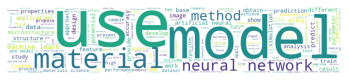

In [33]:
word_cloud(documents, width=1000, height=200, collocations=True, background_color='white')

In [34]:
documents_abs = dict_dfs['df_doc_info']['abstract_prep'].fillna(' ').tolist()
documents_body = dict_dfs['df_doc_info']['body_prep'].fillna(' ').tolist()
documents_all_text = [' '.join([abst, body]) for abst, body in zip(documents_abs, documents_body)]

In [35]:
def text_statistics(text):
    
    """"""
    
    dictStats = {}
    dictStats['num_chars'] = len(text)
    list_tokens = text_tokenize(str(text))
    dictStats['num_words'] = len(list_tokens)
    dictStats['num_words_unique'] = len(set(list_tokens))
    
    len_words = pd.Series([len(w) for w in list_tokens]).describe().to_dict()
    dictStats['mean_lenght_word'] = len_words['mean']
    dictStats['min_lenght_word'] = len_words['min']
    dictStats['max_lenght_word'] = len_words['max']
    dictStats['std_lenght_word'] = len_words['std']
    dictStats['first_quartile_lenght_word'] = len_words['25%']
    dictStats['second_quartile_median_lenght_word'] = len_words['50%']
    dictStats['third_quartile_lenght_word'] = len_words['75%']
    
    return dictStats

In [36]:
df_articles_stats = pd.DataFrame(list(map(lambda e: text_statistics(e), documents_all_text)))

In [37]:
token_text = text_tokenize(' '.join(documents_all_text))

In [38]:
words_freq = pd.value_counts(token_text)
words_freq = pd.DataFrame(words_freq,columns=['frequency'])
words_freq.index.name = 'word'
words_freq = words_freq.reset_index()

words_freq.head()

,word,frequency
0,the,31896
1,model,26780
2,use,22826
3,fig,17820
4,data,15962


list_bigrams = list(nltk.bigrams(token_text))
bigram_freq = pd.value_counts(list_bigrams)
df_bigram = pd.DataFrame(bigram_freq, columns=['frequency'])
df_bigram.index.name = 'bigram'
df_bigram = df_bigram.reset_index()

df_bigram.head()

list_trigam = list(nltk.trigrams(token_text))
trigam_freq = pd.value_counts(list_trigam)
df_trigram = pd.DataFrame(trigam_freq, columns=['frequency'])
df_trigram.index.name = 'trigram'
df_trigram = df_trigram.reset_index()

df_trigram.head()

In [ ]:
dict_agg_stats = {}

# Chars
dict_agg_stats['num_total_chars'] = df_articles_stats['num_chars'].sum()
dict_agg_stats['num_mean_chars'] = df_articles_stats['num_chars'].mean()
dict_agg_stats['num_min_chars'] = df_articles_stats['num_chars'].min()
dict_agg_stats['num_max_chars'] = df_articles_stats['num_chars'].max()

# num_words
dict_agg_stats['num_total_words'] = df_articles_stats['num_words'].sum()
dict_agg_stats['num_mean_words'] = df_articles_stats['num_words'].mean()
dict_agg_stats['num_min_words'] = df_articles_stats['num_words'].min()
dict_agg_stats['num_max_chars'] = df_articles_stats['num_words'].max()

# num_words_unique
dict_agg_stats['num_total_words_unique'] = df_articles_stats['num_words'].sum()
dict_agg_stats['num_mean_words_unique'] = df_articles_stats['num_words'].mean()
dict_agg_stats['num_min_words_unique'] = df_articles_stats['num_words'].min()
dict_agg_stats['num_max_chars_unique'] = df_articles_stats['num_words'].max()

# mean_lenght_word
dict_agg_stats['mean_length_words'] = df_articles_stats['mean_lenght_word'].mean()

# mean_lenght_word
dict_agg_stats['lexical_density'] = dict_agg_stats['num_mean_words']/dict_agg_stats['num_mean_words_unique']
    

--------------------------------

Criando BOW e TFIDF:

In [39]:
documents = dict_dfs['df_doc_info']['abstract_prep'].fillna(' ').tolist()

In [40]:
obj_bow = CountVectorizer(encoding="utf-8",
                          stop_words="english",
                          strip_accents="ascii",
                          lowercase=True, 
                          preprocessor=None,
                          tokenizer=None,
                          token_pattern=r"""(?u)\b\w\w+\b""",
                          ngram_range=(1,2), # Unigram and bigram
                          analyzer="word",
                          max_df=1.0,
                          min_df=2, # May have at least 2 frequency
                          max_features=None, 
                          vocabulary= None, 
                          binary=False, 
                          dtype=np.int64)

obj_tfidf = TfidfVectorizer(encoding="utf-8",
                            stop_words="english",
                            strip_accents="ascii",
                            lowercase=True, 
                            preprocessor=None,
                            tokenizer=None,
                            token_pattern=r"""(?u)\b\w\w+\b""",
                            ngram_range=(1,2), # Unigram and bigram
                            analyzer="word",
                            max_df=1.0,
                            min_df=2, # May have at least 2 frequency
                            max_features=None, 
                            vocabulary= None, 
                            binary=False, 
                            dtype=np.float64, 
                            norm='l2', 
                            use_idf=True, 
                            smooth_idf=True, 
                            sublinear_tf=False)

obj_bow = obj_bow.fit(raw_documents=documents)
bow_matrix = obj_bow.transform(documents)

obj_tfidf = obj_tfidf.fit(raw_documents=documents)
tfidf_matrix = obj_tfidf.transform(documents)

bow_matrix = bow_matrix.todense()
tfidf_matrix = tfidf_matrix.todense()

df_bow = pd.DataFrame(bow_matrix, columns=obj_bow.get_feature_names())
df_tfidf = pd.DataFrame(tfidf_matrix, columns=obj_tfidf.get_feature_names())

In [41]:
df_bow.head(3)

,aa,aa aluminum,aare,ab,ab initio,abaqus,abilities,ability,ability feasible,ability gfa,...,zirconia,zn,zn alloy,zn coat,zncl,zone,zone fz,zr,zr hf,zro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df_tfidf.head(3)

,aa,aa aluminum,aare,ab,ab initio,abaqus,abilities,ability,ability feasible,ability gfa,...,zirconia,zn,zn alloy,zn coat,zncl,zone,zone fz,zr,zr hf,zro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


--------------------------------

Trabalhando com a similaridade de Cosseno:

In [43]:
cos_bow_sim = cosine_similarity(df_bow, df_bow)
cos_tfidf_sim = cosine_similarity(df_tfidf, df_tfidf)

df_cos_bow_sim = pd.DataFrame(cos_bow_sim,
                              columns=dict_dfs['df_doc_info'].index.tolist(),
                              index=dict_dfs['df_doc_info'].index.tolist())

df_cos_tfidf_sim = pd.DataFrame(cos_tfidf_sim,
                                columns=dict_dfs['df_doc_info'].index.tolist(),
                                index=dict_dfs['df_doc_info'].index.tolist())

In [44]:
df_cos_bow_sim.head()

,D8DBD834EA0983B83E02321DA2128633,BB450C34B3B4ED4F52F055160FC5F6D8,1A8B35D171247B5B8A41266F7F761C21,83CD35EAAED6A5F34F677C7B31D0FC10,5E62DEEE3CC2B3C17F83E286B5306610,5EEB701057AB0C125663AC0D254871E9,40BD8055208B8271F722930ABEC3433B,90EE195A779D4CE929BA0A5343AF2DE5,5E18950979F1ED5E0B21400FEB7CD8DB,B739705F34A5C05AC0DC9454B549B713,...,5738B3337DA48C2F221412A93F30180E,200402FDBB6A6EF159F4210B33B7C88A,3FFC2431AEF07A37F7E82F6130A533ED,5327DC684E75934490CDECDAFC576817,9080576B6C8B28463C0D6863A5D9A831,8CB556A94C3E38857BEA8257AF909C9B,F7F2742DC3DF7F25CB8B125C35EE14BD,BBB93ED5C68060AC850E733819718223,8C7EE898CABD90B92F730DA0A6DD231D,B8E24BFE713820838A74E267B073C1E3
D8DBD834EA0983B83E02321DA2128633,1.000000,0.189512,0.216016,0.046402,0.380508,0.141436,0.167930,0.220177,0.281812,0.172844,...,0.091001,0.232036,0.052428,0.246991,0.020398,0.283666,0.038042,0.155307,0.020126,0.125136
BB450C34B3B4ED4F52F055160FC5F6D8,0.189512,1.000000,0.086424,0.055693,0.125350,0.151327,0.101839,0.202469,0.257065,0.159481,...,0.069903,0.083550,0.046146,0.129043,0.036723,0.134060,0.035223,0.079889,0.043481,0.087112
1A8B35D171247B5B8A41266F7F761C21,0.216016,0.086424,1.000000,0.150868,0.321512,0.087842,0.118231,0.184081,0.130895,0.108381,...,0.091299,0.248558,0.116887,0.194353,0.081004,0.289041,0.063611,0.014840,0.092546,0.202267
83CD35EAAED6A5F34F677C7B31D0FC10,0.046402,0.055693,0.150868,1.000000,0.113409,0.074025,0.100000,0.127751,0.053985,0.029101,...,0.098058,0.070321,0.081601,0.104371,0.153855,0.101888,0.210819,0.062159,0.124698,0.265185
5E62DEEE3CC2B3C17F83E286B5306610,0.380508,0.125350,0.321512,0.113409,1.000000,0.109402,0.123378,0.234993,0.211928,0.141660,...,0.097519,0.319000,0.098566,0.221252,0.172568,0.259987,0.022989,0.048803,0.093648,0.187033


In [45]:
df_cos_tfidf_sim.head()

,D8DBD834EA0983B83E02321DA2128633,BB450C34B3B4ED4F52F055160FC5F6D8,1A8B35D171247B5B8A41266F7F761C21,83CD35EAAED6A5F34F677C7B31D0FC10,5E62DEEE3CC2B3C17F83E286B5306610,5EEB701057AB0C125663AC0D254871E9,40BD8055208B8271F722930ABEC3433B,90EE195A779D4CE929BA0A5343AF2DE5,5E18950979F1ED5E0B21400FEB7CD8DB,B739705F34A5C05AC0DC9454B549B713,...,5738B3337DA48C2F221412A93F30180E,200402FDBB6A6EF159F4210B33B7C88A,3FFC2431AEF07A37F7E82F6130A533ED,5327DC684E75934490CDECDAFC576817,9080576B6C8B28463C0D6863A5D9A831,8CB556A94C3E38857BEA8257AF909C9B,F7F2742DC3DF7F25CB8B125C35EE14BD,BBB93ED5C68060AC850E733819718223,8C7EE898CABD90B92F730DA0A6DD231D,B8E24BFE713820838A74E267B073C1E3
D8DBD834EA0983B83E02321DA2128633,1.000000,0.039256,0.056788,0.033863,0.120352,0.041079,0.043893,0.057024,0.052883,0.039343,...,0.036116,0.048323,0.013468,0.084174,0.010314,0.072601,0.020993,0.044207,0.012343,0.039143
BB450C34B3B4ED4F52F055160FC5F6D8,0.039256,1.000000,0.023146,0.025152,0.028545,0.052525,0.028077,0.106579,0.103211,0.047627,...,0.015632,0.014402,0.010495,0.040013,0.011699,0.029787,0.014039,0.022865,0.020307,0.021520
1A8B35D171247B5B8A41266F7F761C21,0.056788,0.023146,1.000000,0.060774,0.116447,0.030802,0.026230,0.051984,0.028093,0.025174,...,0.047433,0.067197,0.036597,0.103970,0.030687,0.073014,0.028649,0.005148,0.034986,0.078839
83CD35EAAED6A5F34F677C7B31D0FC10,0.033863,0.025152,0.060774,1.000000,0.043667,0.024273,0.029989,0.045550,0.023060,0.006978,...,0.023456,0.023620,0.063427,0.042804,0.048265,0.038043,0.159111,0.025148,0.038164,0.183316
5E62DEEE3CC2B3C17F83E286B5306610,0.120352,0.028545,0.116447,0.043667,1.000000,0.040908,0.025120,0.072148,0.038458,0.038238,...,0.030705,0.081882,0.038840,0.055552,0.071732,0.054733,0.013604,0.013003,0.027114,0.043188


Gerando grafo de similaridade de cosseno:

In [46]:
def filter_sim_matrix(matrix, percentil="75%", value_min=0, value_max=1):
    """"""
    list_elements = []
    for colum in df_cos_tfidf_sim.columns.tolist():
        list_elements += df_cos_tfidf_sim[colum].tolist()
    sim_describe = pd.Series(list_elements).describe(percentiles=np.arange(0, 1, 0.001))
    del list_elements
    
    filter_matrix = sim_describe[percentil]
    
    list_filter = []
    for i,row in matrix.iterrows():
        for j in row.index:
            value = matrix.loc[i,j]
            logic_filter = value>=filter_matrix and value>value_min and value<value_max
            if not pd.isna(value) and logic_filter:
                dictCell = {"doc_a":i,"doc_b":j,'value':matrix.loc[i,j]}
                list_filter.append(dictCell)
    df_maxtrix_filter = pd.DataFrame(list_filter)
    del list_filter
    
    return df_maxtrix_filter

In [47]:
def make_sim_graph(matrix,
                   node_data,
                   source_column="doc_a",
                   to_column="doc_b",
                   value_column="value",
                   height="500px",
                   width="500px",
                   directed=False,
                   notebook=False,
                   bgcolor="#ffffff",
                   font_color=False,
                   layout=None,
                   heading="",
                   path_graph="./", 
                   name_file="graph.html"):
    """"""
    graph = Network(height=height,
                    width=width,
                    directed=directed,
                    notebook=notebook,
                    bgcolor=bgcolor,
                    font_color=font_color,
                    layout=layout,
                    heading=heading)

    for i, row in node_data.iterrows():
        
        article_id = str(row['pdf_md5'])
        article_title = str(row['title_head'])
        article_abstract_short = str(row['abstract_short'])
        article_date = str(row['date_head'])
        article_number_authors = str(row['author_count'])
        article_number_citations = str(row['citation_count'])
        article_doi = str(row['doi_head'])
        article_file_name = str(row['file_name'])
        article_file_path = str(row['file'])
        
        title_html = f"""Article Title:{article_title}
                         Article Date:{article_date}
                         Article Number Authors:{article_number_authors}
                         Article Number Citations:{article_number_citations}
                         Article DOI:{article_doi}
                         Article File Name:{article_file_name}"""
        
        graph.add_node(n_id=article_id, 
                       label=f"Node ID: {str(article_id)[0:4]}", 
                       borderWidth=1, 
                       borderWidthSelected=2, 
                       #brokenImage="url", 
                       #group="a", 
                       #hidden=False, 
                       #image="url", 
                       #labelHighlightBold=True, 
                       #level=1, 
                       #mass=1, 
                       #physics=True,
                       shape="dot", # image, circularImage, diamond, dot, star, triangle, triangleDown, square and icon
                       size=1, 
                       title=title_html,  
                       #x=0.5, 
                       #y=1.0)
                       value=1)
        
    for i,row in matrix.iterrows():
        
        graph.add_edge(source=row[source_column],
                       to=row[to_column],
                       value=round(row[value_column],1),
                       title=row[value_column])
                       #width=row['value'],
                       #arrowStrikethrough=False,
                       #physics=False,
                       #hidden=False)
    
    graph.force_atlas_2based(gravity=-50,
                             central_gravity=0.01,
                             spring_length=360,
                             spring_strength=0.08,
                             damping=0.4,
                             overlap=0)
    
    graph.save_graph(os.path.join(path_graph, name_file))
    graph.show_buttons(filter_=['physics'])
    graph.show(name_file)
    
    return graph   

In [48]:
df_cos_bow_sim_filter = filter_sim_matrix(df_cos_bow_sim, percentil="99%", value_min=0, value_max=0.99)
df_cos_bow_sim_filter = df_cos_bow_sim_filter.nlargest(300,'value')

df_cos_tfidf_sim_filter = filter_sim_matrix(df_cos_tfidf_sim, percentil="99%", value_min=0, value_max=0.99)
df_cos_tfidf_sim_filter = df_cos_tfidf_sim_filter.nlargest(300,'value')

In [49]:
# Selecting head article data
cols_head = ['title_head', 'doi_head', 'date_head',]
head_data = dict_dfs['df_doc_head'].loc[:,cols_head].reset_index().copy()
head_data['title_head'] = head_data['title_head'].apply(lambda e: str(e)[0:50] + "..." if len(str(e)) > 50 else str(e))

# Selecting head article data
cols_info = ['abstract','file']
doc_info_data = dict_dfs['df_doc_info'].loc[:,cols_info].reset_index().copy()
doc_info_data['file_name'] = doc_info_data['file'].apply(lambda e: os.path.split(e)[-1])
doc_info_data['abstract_short'] = doc_info_data['abstract'].apply(lambda e: str(e)[0:20] + "..." if len(str(e)) > 20 else str(e))
doc_info_data.drop(labels=['abstract'], axis=1, inplace=True)

# Selecting authors information
authors_data = dict_dfs['df_doc_authors'].reset_index()
authors_data = authors_data.groupby(by=['pdf_md5'], as_index=False)['full_name_author'].count()
authors_data.rename(columns={'full_name_author':'author_count'}, inplace=True)

# Selecting citations information
citations_data = dict_dfs['df_doc_citations'].reset_index()
citations_data = citations_data.groupby(by=['pdf_md5'], as_index=False)['index_citation'].count()
citations_data.rename(columns={'index_citation':'citation_count'}, inplace=True)

nodes = list(set(df_cos_bow_sim_filter.doc_a.tolist()+df_cos_bow_sim_filter.doc_b.tolist()))
df_nodes = pd.DataFrame(nodes, columns=['pdf_md5'])

df_nodes = df_nodes.merge(head_data, how='left', on='pdf_md5')
df_nodes = df_nodes.merge(doc_info_data, how='left', on='pdf_md5')
df_nodes = df_nodes.merge(authors_data, how='left', on='pdf_md5')
df_nodes = df_nodes.merge(citations_data, how='left', on='pdf_md5')

In [50]:
df_cos_tfidf_sim_filter.head()

,doc_a,doc_b,value
81,13DDCC885AEB03F69165F9DB6076864C,13EF01368C4B64913BAC3B6B06D855FF,0.892992
82,13DDCC885AEB03F69165F9DB6076864C,1451EBDA3D877A66CD0810390DA1F79A,0.892992
105,9BEBA8ECF7E7037BAAFB6E4CEAD0DC43,13EF01368C4B64913BAC3B6B06D855FF,0.892992
106,9BEBA8ECF7E7037BAAFB6E4CEAD0DC43,1451EBDA3D877A66CD0810390DA1F79A,0.892992
117,3A05ADAA3D4DA1371BB14438393383D7,13EF01368C4B64913BAC3B6B06D855FF,0.892992


In [51]:
sim_graph = make_sim_graph(matrix=df_cos_bow_sim_filter,
                           node_data=df_nodes,
                           source_column="doc_a",
                           to_column="doc_b",
                           value_column="value",
                           height="1000px",
                           width="1000px",
                           directed=True,
                           notebook=False,
                           bgcolor="#ffffff",
                           font_color=False,
                           layout=None,
                           heading="",
                           path_graph="./", 
                           name_file="graph.html")

In [47]:
dict_dfs.keys()

dict_keys(['df_doc_info', 'df_doc_head', 'df_doc_authors', 'df_doc_citations', 'df_doc_authors_citations'])

In [48]:
df_nodes.head(3).T

,0,1,2
pdf_md5,22D85DDA992554F017589484A42AC80E,018A6DCEA3374B0D9F6EBF279926BD10,314A5C0E6A8EEA4F2DC43EF27E1CC2BE
title_head,Deep Learning-based Discriminative Refocusing ...,Artificial neural network modified constitutiv...,Artificial neural network approach to predict ...
doi_head,10.1016/j.actamat.2021.116987,10.1016/j.msea.2021.141259,10.1016/j.commatsci.2011.01.015
date_head,NaN,2021-04-18,NaN
file,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...
file_name,j.actamat.2021.116987.pdf,j.msea.2021.141259.pdf,j.commatsci.2011.01.015.pdf
abstract_short,This is a PDF file o...,To study the hot def...,Isothermal compressi...
author_count,6,6,5
citation_count,52,46,35


In [49]:
dict_dfs['df_doc_citations'].head(3)

,index_citation,id_citation,unstructured_citation,date_citation,title_citation,book_title_citation,series_title_citation,journal_citation,journal_abbrev_citation,publisher_citation,...,first_page_citation,last_page_citation,note_citation,doi_citation,pmid_citation,pmcid_citation,arxiv_id_citation,ark_citation,istex_id_citation,url_citation
pdf_md5,,,,,,,,,,,,,,,,,,,,,
6626851C6FCB1527706C9BEDC03D12FF,0,b0,National Science and Technology Council (U.S.)...,2011,Materials Genome Initiative for Global Competi...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6626851C6FCB1527706C9BEDC03D12FF,1,b1,"S. Curtarolo, et al., AFLOWLIB.ORG: A distribu...",2012,ORG: A distributed materials properties reposi...,NaN,NaN,Comput. Mater. Sci,NaN,NaN,...,227,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6626851C6FCB1527706C9BEDC03D12FF,2,b2,"A. Jain, et al., Commentary: the Materials Pro...",2013,Commentary: the Materials Project: A materials...,NaN,NaN,APL Mater,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_cos_bow_sim_filter.head(3).T

,160,161,929
doc_a,16084FC6B5C25AF4A5F11957425A9396,16084FC6B5C25AF4A5F11957425A9396,F552BCBA44563DB3A3286029363E21F2
doc_b,1451EBDA3D877A66CD0810390DA1F79A,13EF01368C4B64913BAC3B6B06D855FF,1451EBDA3D877A66CD0810390DA1F79A
value,0.95141,0.95141,0.95141


In [51]:
dict_dfs['df_doc_head'].head(3).T

pdf_md5,6626851C6FCB1527706C9BEDC03D12FF,92D61639BAD7D4AD564A8CBD7E0E2D80,16084FC6B5C25AF4A5F11957425A9396
index_head,NaN,NaN,NaN
id_head,NaN,NaN,NaN
unstructured_head,NaN,NaN,NaN
date_head,NaN,NaN,2020-05-01
title_head,Computational Materials Science,Investigation of the property hull for solid o...,Journal Pre-proof Deep Learning Analysis on Mi...
book_title_head,NaN,NaN,NaN
series_title_head,NaN,NaN,NaN
journal_head,NaN,NaN,NaN
journal_abbrev_head,NaN,NaN,NaN
publisher_head,NaN,NaN,NaN


In [52]:
dict_dfs['df_doc_info'].head(3).T

pdf_md5,6626851C6FCB1527706C9BEDC03D12FF,92D61639BAD7D4AD564A8CBD7E0E2D80,16084FC6B5C25AF4A5F11957425A9396
grobid_version,0.7.0,0.7.0,0.7.0
grobid_timestamp,2022-05-15 02:09:00,2022-05-15 02:09:00,2022-05-15 02:11:00
language_code,en,en,en
acknowledgement,Acknowledgements The work by PK and JCN is par...,Acknowledgment The authors would like to ackno...,Acknowledgements This work is supported by Chi...
abstract,The steady growth of online materials database...,Designing optimal microstructures for solid ox...,This is a PDF file of an article that has unde...
body,Introduction The use of machine learning in th...,Introduction Fuel cells (FCs) offer many advan...,Introduction A primary goal of materials scien...
annex,NaN,NaN,NaN
file,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...
status,status 200,status 200,status 200
raw_data,"<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x...","<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x...","<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x..."


--------------------------                             

In [53]:
from keybert import KeyBERT

In [54]:
kw_model = KeyBERT()

In [55]:
doc = dict_dfs['df_doc_info']['abstract'].iat[0]
doc

'Methods of predicting the martensite start temperature as a function of composition have been evaluated. A technique has been demonstrated which improves the performance of linear regression models by applying the concept of a committee borrowed from more sophisticated empirical techniques. These linear regression models, neural network models, thermodynamic models and a hybrid thermodynamic-neural network model are tested using various assessment parameters. The thermodynamic model has the best performance when tested within a typical range of the input space. Bayesian neural networks possess the advantage that their predictions are naturally accompanied by an estimate of uncertainty and they can have the best performance when this is considered. Combining the thermodynamic model with a neural network was achieved, combining the advantages of the two methods.'

In [94]:
def get_aleatory_color():
    
	'''Returns color in hex format'''
 
	red_int = random.randint(0,255)
	green_int = random.randint(0,255)
	blue_int = random.randint(0,255)
 
	return '#{:02X}{:02X}{:02X}'.format(red_int, green_int, blue_int)

In [1]:
def make_keywords_graph(edges_key_articles,
                        node_data,
                        node_keywords_data,
                        source_column="keyword",
                        to_column="pdf_md5",
                        value_column="value",
                        height="500px",
                        width="500px",
                        directed=False,
                        notebook=False,
                        bgcolor="#ffffff",
                        font_color=False,
                        layout=None,
                        heading="",
                        path_graph="./", 
                        name_file="graph_keyword.html"):
    
    """"""
    
    graph = Network(height=height,
                    width=width,
                    directed=directed,
                    notebook=notebook,
                    bgcolor=bgcolor,
                    font_color=font_color,
                    layout=layout,
                    heading=heading)

    for i, row in node_data.iterrows():
        
        article_id = str(row['pdf_md5'])
        article_title = str(row['title_head'])
        article_abstract_short = str(row['abstract_short'])
        article_date = str(row['date_head'])
        article_number_authors = str(row['author_count'])
        article_number_citations = str(row['citation_count'])
        article_doi = str(row['doi_head'])
        article_file_name = str(row['file_name'])
        article_file_path = str(row['file'])
        
        title_html = f"""Article Title:{article_title}
                         Article Date:{article_date}
                         Article Number Authors:{article_number_authors}
                         Article Number Citations:{article_number_citations}
                         Article DOI:{article_doi}
                         Article File Name:{article_file_name}"""
        
        graph.add_node(n_id=article_id, 
                       label=f"Node ID: {str(article_id)[0:4]}", 
                       borderWidth=1, 
                       borderWidthSelected=2, 
                       #brokenImage="url", 
                       #group="a", 
                       #hidden=False, 
                       #image="url", 
                       #labelHighlightBold=True, 
                       #level=1, 
                       #mass=1, 
                       #physics=True,
                       shape="dot", # image, circularImage, diamond, dot, star, triangle, triangleDown, square and icon
                       size=1, 
                       title=title_html,  
                       #x=0.5, 
                       #y=1.0)
                       value=1)
        
    for i, row in node_keywords_data.iterrows():
        
        keyword_id = str(row['keyword'])
        article_count = row['article_count']
        value_sum = row['value_sum']
        value_mean = row['value_mean']
        
        title_html = f"""KeyWord: {keyword_id}
                         Article Count: {article_count}
                         Value Sum: {value_sum}
                         Value Mean: {value_mean}
                      """
        
        graph.add_node(n_id=keyword_id, 
                       label=keyword_id, 
                       borderWidth=2, 
                       borderWidthSelected=4,
                       color=get_aleatory_color(),
                       #brokenImage="url", 
                       #group="a", 
                       #hidden=False, 
                       #image="url", 
                       #labelHighlightBold=True, 
                       #level=1, 
                       #mass=1, 
                       #physics=True,
                       shape="square", # image, circularImage, diamond, dot, star, triangle, triangleDown, square and icon
                       size=article_count, 
                       title=title_html,  
                       #x=0.5, 
                       #y=1.0)
                       value=article_count)
    
    for i, row in edges_key_articles.iterrows():
        
        graph.add_edge(source=row[source_column],
                       to=row[to_column],
                       value=round(row[value_column],1),
                       title=row[value_column])
                       #width=row['value'],
                       #arrowStrikethrough=False,
                       #physics=False,
                       #hidden=False)
    
    graph.force_atlas_2based(gravity=-50,
                             central_gravity=0.01,
                             spring_length=360,
                             spring_strength=0.08,
                             damping=0.4,
                             overlap=0)
    
    graph.save_graph(os.path.join(path_graph, name_file))
    graph.show_buttons(filter_=['physics'])
    graph.show(name_file)
    
    return graph   

In [74]:
dict_keywords = {}
id_column = 'pdf_md5'
text_column = 'abstract'
col_select = [id_column,text_column]
docs = dict_dfs['df_doc_info'].reset_index().loc[:, col_select]

list_keywordsdf = []
list_keywordsdf_article = []
for i, row in docs.iterrows():
    
    doc = str(row[text_column])
    id = row[id_column]
    
    keywords_unigram = kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words='english', highlight=False, top_n=10)
    if len(keywords_unigram):
        df_unigram = pd.DataFrame([{'keyword':v[0],'value':v[1]} for v in keywords_unigram])
    else:
        df_unigram = pd.DataFrame([], columns=['keyword','value'])

    keywords_bigram = kw_model.extract_keywords(doc, keyphrase_ngram_range=(2, 2), stop_words='english', highlight=False, top_n=10)
    if len(keywords_bigram):
        df_bigram = pd.DataFrame([{'keyword':v[0],'value':v[1]} for v in keywords_bigram])
    else:
        df_bigram = pd.DataFrame([], columns=['keyword','value'])

    keywords_trigam = kw_model.extract_keywords(doc, keyphrase_ngram_range=(3, 3), stop_words='english', highlight=False, top_n=10)
    if len(keywords_bigram):
        df_trigram = pd.DataFrame([{'keyword':v[0],'value':v[1]} for v in keywords_trigam])
    else:
        df_trigram = pd.DataFrame([], columns=['keyword','value'])
    
    dict_keywords[id] = {'unigram':df_unigram, 'bigram':df_bigram, 'trigram':df_trigram}
    
    df_article_keywords = pd.concat([df_unigram, df_bigram, df_trigram])
    df_article_keywords[id_column] = id
    df_article_keywords = df_article_keywords.loc[:,[id_column,'keyword', 'value']].copy()
    list_keywordsdf_article.append(df_article_keywords)
    
    df_unigram.rename(columns={'keyword':'keyword_unigram','value':'value_unigram'}, inplace=True)
    df_bigram.rename(columns={'keyword':'keyword_bigram','value':'value_bigram'}, inplace=True)
    df_trigram.rename(columns={'keyword':'keyword_trigram','value':'value_trigram'}, inplace=True)
    
    df_keywords_article = pd.concat([df_unigram, df_bigram, df_trigram], axis=1)
    dict_keywords[id]['df_keywords'] = df_keywords_article
    
    list_keywordsdf.append(df_keywords_article)
    
df_keywords_all = pd.concat(list_keywordsdf)
df_keywords_all.dropna(inplace=True)

df_article_keywords_all = pd.concat(list_keywordsdf_article)
df_article_keywords_all.dropna(inplace=True)

df_keywords_unigram = df_keywords_all.groupby(by=['keyword_unigram'], as_index=False)['value_unigram'].sum()
df_keywords_unigram.sort_values(by='value_unigram', ascending=False, inplace=True)

df_keywords_bigram = df_keywords_all.groupby(by=['keyword_bigram'], as_index=False)['value_bigram'].sum()
df_keywords_bigram.sort_values(by='value_bigram', ascending=False, inplace=True)

df_keywords_trigram = df_keywords_all.groupby(by=['keyword_trigram'], as_index=False)['value_trigram'].sum()
df_keywords_trigram.sort_values(by='value_trigram', ascending=False, inplace=True)

df_keywords_all = pd.concat([df_keywords_unigram, df_keywords_bigram, df_keywords_trigram], axis=1)
df_keywords_all = df_keywords_all.head(200)

In [81]:
def agg_keys_node_data(grupo):
    """"""
    dictAgg = {}
    dictAgg['keyword'] = grupo['keyword'].iat[0]
    dictAgg['article_count'] = grupo['pdf_md5'].shape[0]
    dictAgg['value_sum'] = grupo['value'].sum()
    dictAgg['value_mean'] = grupo['value'].mean()
    
    return pd.Series(dictAgg)

df_keyword_data = df_article_keywords_all.groupby(by=['keyword'], as_index=False).apply(agg_keys_node_data)
top_keywords = 100 # int(df_keyword_data.shape[0]*0.1)
df_keyword_data = df_keyword_data.sort_values(by=['article_count'], ascending=False).head(top_keywords)

In [4]:
df_keyword_data.head()

NameError: name 'df_keyword_data' is not defined

In [2]:
df_article_keywords_all.head()

NameError: name 'df_article_keywords_all' is not defined

In [ ]:
keywords_graph = make_keywords_graph(edges_key_articles=df_article_keywords_all,
                                     node_data=df_nodes,
                                     node_keywords_data=df_keyword_data,
                                     source_column="keyword",
                                     to_column="pdf_md5",
                                     value_column="value",
                                     height="500px",
                                     width="500px",
                                     directed=False,
                                     notebook=False,
                                     bgcolor="#ffffff",
                                     font_color=False,
                                     layout=None,
                                     heading="",
                                     path_graph="./", 
                                     name_file="graph_keyword.html")

--------------------------                             

In [ ]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, OPTICS

!pip install keybert

In [58]:
dict_dfs.keys()

dict_keys(['df_doc_info', 'df_doc_head', 'df_doc_authors', 'df_doc_citations', 'df_doc_authors_citations'])

In [59]:
dict_dfs['df_doc_info'].head()

,grobid_version,grobid_timestamp,language_code,acknowledgement,abstract,body,annex,file,status,raw_data,acknowledgement_prep,abstract_prep,body_prep
pdf_md5,,,,,,,,,,,,,
39C614A80AE3DB1C491808B5F4368DE0,0.7.0,2022-05-15 02:11:00,en,NaN,One of the most exciting tools that have enter...,"INTRODUCTION In recent years, the availability...",NaN,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...,status 200,"<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x...",NaN,one excite tool enter material science toolbox...,introduction in recent years availability larg...
43635A886CDF0511DE3914D4639F3A2F,0.7.0,2022-05-15 02:09:00,en,Acknowledgements,We evaluate the performance of a popular machi...,Introduction Substitutional solute diffusion i...,NaN,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...,status 200,"<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x...",acknowledgements,we evaluate performance popular machine learn ...,introduction substitutional solute diffusion s...
39B3218D2D1F1BF589CB94AF16E3D614,0.7.0,2022-05-15 02:11:00,en,Acknowledgements The authors would like to tha...,The design of new materials with useful proper...,Introduction Science is in an exponential worl...,NaN,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...,status 200,"<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x...",acknowledgements the author would like thank s...,the design new materials useful properties bec...,introduction science exponential world amount ...
97B26E5551FF3EE3EC06CDF56313E7E2,0.7.0,2022-05-15 02:09:00,en,Acknowledgement We gratefully acknowledge disc...,The diffusion of large databases collecting di...,"Introduction In the latest years, the developm...",NaN,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...,status 200,"<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x...",acknowledgement we gratefully acknowledge disc...,the diffusion large databases collect differen...,introduction in latest years development effic...
74E9686FDB9BFAD7CFA95CF45DE0CBB6,0.7.0,2022-05-15 02:10:00,en,Acknowledgements,The present work proposed a characteristic-par...,"Introduction Compared with uranium dioxides, u...",NaN,C:\Users\vierb\OneDrive\Área de Trabalho\Proje...,status 200,"<?xml version=""1.0"" encoding=""UTF-8""?>\n<TEI x...",acknowledgements,the present work propose characteristicparamet...,introduction compared uranium dioxides uranium...


In [118]:
df_tfidf.head()

,aa,aa aluminum,aare,ab,ab initio,abaqus,abilities,ability,ability feasible,ability gfa,...,zirconia,zn,zn alloy,zn coat,zncl,zone,zone fz,zr,zr hf,zro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
df_tfidf.shape

(581, 7503)

In [ ]:
np.sqrt()

In [ ]:
KMeans()